In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [5]:
train_df = pd.read_csv("Data/hin_train_avg_w2v.csv")
test_df = pd.read_csv("Data/hin_test_avg_w2v.csv")
X_train = train_df.drop(columns=["Y"])
Y_train = train_df["Y"]
X_test = test_df.drop(columns=["Y"])
Y_test = test_df["Y"]

y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(Y_test)
y_train.shape, Y_train.shape, y_test.shape, Y_test.shape

le = LabelEncoder()
Y_train = pd.DataFrame(le.fit_transform(Y_train.values))
Y_test = pd.DataFrame(le.fit_transform(Y_test.values))


In [6]:
Y_train.head()

,0
0,1
1,2
2,1
3,1
4,2


In [8]:
y_train.head()

,CAG,NAG,OAG
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [12]:
# X_train = pd.DataFrame(X_train.head(20))
# X_test = pd.DataFrame(X_test.head(20))
# Y_train = pd.DataFrame(Y_train.head(20))
# Y_test = pd.DataFrame(Y_test.head(20))
# y_train = pd.DataFrame(y_train.head(20))
# y_test = pd.DataFrame(y_test.head(20))

In [13]:
clf = SVC(C=1000, gamma=0.001, kernel='rbf', probability=True)
clf.fit(X_train.values, Y_train.values)
probs = clf.predict_proba(X_test.values)
roc_auc_score(Y_test.values, probs, multi_class='ovr', average='weighted')

/home/rachit/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.275

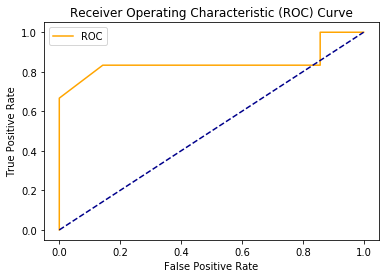

In [20]:
clf0 = SVC(C=1000, gamma=0.001, kernel='rbf', probability=True)
clf0.fit(X_train.values, y_train.iloc[:, 0].values)
probs0 = clf0.predict_proba(X_test.values)
fper, tper, threshold = roc_curve(y_test.iloc[:, 0].values, probs0[:, 1])
plot_roc_cur(fper, tper)

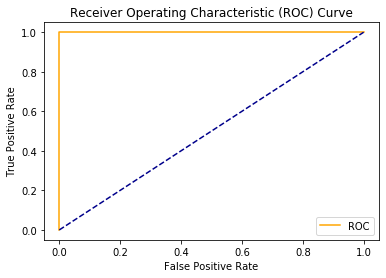

In [21]:
clf1 = SVC(C=1000, gamma=0.001, kernel='rbf', probability=True)
clf1.fit(X_train.values, y_train.iloc[:, 1].values)
probs1 = clf1.predict_proba(X_test.values)
fper, tper, threshold = roc_curve(y_test.iloc[:, 1].values, probs1[:, 1])
plot_roc_cur(fper, tper)

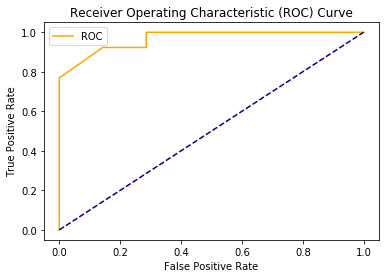

In [22]:
clf2 = SVC(C=1000, gamma=0.001, kernel='rbf', probability=True)
clf2.fit(X_train.values, y_train.iloc[:, 2].values)
probs2 = clf2.predict_proba(X_test.values)
fper, tper, threshold = roc_curve(y_test.iloc[:, 2].values, probs2[:, 1])
plot_roc_cur(fper, tper)